In [1]:
#import the neccesary files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
gpp =pd.read_csv('database_IND.csv')
gpp.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
#shape of the dataset
gpp.shape

(907, 27)

In [4]:
gpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
#name of the columns in dataset
gpp.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
#checking for null values
gpp.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

#### Other_fuel2,other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019 and  estimated_generation_gwh has full null values is nothing but empty columns.Im going to deleting all columns

In [7]:
#Dropping unnecessary columns
gpp.drop(columns=['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013',
                 'generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

In [8]:
#After deleting the unnecessary columns shape of the dataset is
gpp.shape

(907, 20)

#### Finally, ofter deleting columns we found 907 rows and 21 columns.Now, we look at filling null values 

In [9]:
# latitude
gpp['latitude'].value_counts()

24.1917    3
19.0004    3
15.2615    2
13.2450    2
11.5336    2
          ..
16.4994    1
9.0870     1
20.9099    1
17.2387    1
16.5973    1
Name: latitude, Length: 836, dtype: int64

In [10]:
gpp['latitude'] = (gpp['latitude'].fillna('24.1917'))

In [11]:
gpp['longitude'].value_counts()

71.6917    4
72.8983    3
81.2875    3
75.8988    3
71.6918    3
          ..
77.9576    1
91.8114    1
80.1264    1
76.1137    1
79.5748    1
Name: longitude, Length: 827, dtype: int64

In [12]:
gpp['longitude'] = (gpp['longitude'].fillna('71.6917'))

In [13]:
gpp.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [14]:
#checking the values in columns in 'commissioning_year'
gpp['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1958.0     1
1949.0     1
1954.0     1
1956.0     1
1927.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [15]:
# Fillig null values in 'commisioning_year' column
gpp['commissioning_year'] =gpp['commissioning_year'].fillna('2015')


In [16]:
# checking owner columns values
gpp['owner'].value_counts()

Jk Cement ltd                               4
Acc Acc ltd                                 4
Sterling Agro Industries ltd.               4
Tata Power Solar Systems Limited (TPREL)    3
Shri Ssk ltd                                3
                                           ..
Punj Lloyd Solar Private Limited            1
Chettinad Corp ltd                          1
Rucha Soya Industries Limited               1
Mukesh Gupta group                          1
Abellon CleanEnergy Limited                 1
Name: owner, Length: 280, dtype: int64

In [17]:
#Owner
gpp['owner'] = gpp['owner'].fillna('Jk Cement ltd')

In [18]:
#geolocation_source
gpp['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [19]:
#Fill nullvalues of geolocation_source
gpp['geolocation_source'] = gpp['geolocation_source'].fillna('WRI')

In [20]:
#year_of_capacity_data
gpp['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [21]:
#filling null values 
gpp['year_of_capacity_data'] = gpp['year_of_capacity_data'].fillna('2019.0')

In [22]:
gpp.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [23]:
#generation_gwh_2014
gpp['generation_gwh_2014'].value_counts()

0.00000       28
6803.31250     1
4735.13000     1
145.81400      1
2022.57000     1
              ..
6224.00000     1
268.48085      1
1255.73200     1
164.32425      1
1153.65300     1
Name: generation_gwh_2014, Length: 371, dtype: int64

In [24]:
gpp['generation_gwh_2014'].fillna(gpp['generation_gwh_2014'].mean(),inplace=True)

In [25]:
gpp.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2014         0
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [26]:
#generation_gwh_2015
gpp['generation_gwh_2015'].value_counts()

0.00000       27
174.17475      1
8076.81050     1
1.09395        1
18.71595       1
              ..
665.19730      1
1516.36010     1
741.86205      1
183.29890      1
7130.50700     1
Name: generation_gwh_2015, Length: 396, dtype: int64

In [27]:
gpp['generation_gwh_2015'].fillna(gpp['generation_gwh_2015'].mean(),inplace=True)

In [28]:
#generation_gwh_2016
gpp['generation_gwh_2016'].value_counts()

0.00000       30
8470.57000     2
1511.00000     2
250.97100      1
7.31325        1
              ..
433.84800      1
283.74811      1
259.94375      1
403.96000      1
307.87290      1
Name: generation_gwh_2016, Length: 403, dtype: int64

In [29]:
gpp['generation_gwh_2016'].fillna(gpp['generation_gwh_2016'].mean(),inplace=True)

In [30]:
#generation_gwh_2017
gpp['generation_gwh_2017'].value_counts()

0.00000       32
170.08530      2
9271.00000     1
59.43135       1
549.86930      1
              ..
214.48220      1
272.73945      1
2887.00000     1
12.73600       1
158.73235      1
Name: generation_gwh_2017, Length: 408, dtype: int64

In [31]:
gpp['generation_gwh_2017'].fillna(gpp['generation_gwh_2017'].mean(),inplace=True)

In [32]:
#generation_gwh_2018
gpp['generation_gwh_2018'].value_counts()

0.00000       39
100.85320      1
805.48235      1
7179.00000     1
6915.39000     1
              ..
980.25410      1
33.88970       1
6474.61425     1
347.34455      1
192.01510      1
Name: generation_gwh_2018, Length: 410, dtype: int64

In [33]:
gpp['generation_gwh_2018'].fillna(gpp['generation_gwh_2018'].mean(),inplace=True)

In [34]:
#generation_data_source
gpp['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [35]:
gpp['generation_data_source']=gpp['generation_data_source'].fillna('Central Electricity Authority')

In [36]:
gpp.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [37]:
gpp['source'].value_counts()

Central Electricity Authority                519
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Unity Power Limite r World                     1
Ambed K Sugar                                  1
Vikram Vikram cement                           1
Sunkon Energy Private Limited                  1
Hiraco India                                   1
Name: source, Length: 191, dtype: int64

In [38]:
gpp.describe()

,capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [39]:
#correlation metrix
gpp.corr()


,capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.694350,0.711190,0.742221,0.757585,0.773456
generation_gwh_2014,0.694350,1.000000,0.953594,0.925874,0.891687,0.884956
generation_gwh_2015,0.711190,0.953594,1.000000,0.968888,0.928242,0.923461
generation_gwh_2016,0.742221,0.925874,0.968888,1.000000,0.964649,0.957159
generation_gwh_2017,0.757585,0.891687,0.928242,0.964649,1.000000,0.982689
generation_gwh_2018,0.773456,0.884956,0.923461,0.957159,0.982689,1.000000


In [40]:
gpp.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [41]:
gpp['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

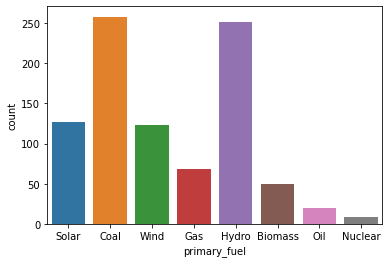

In [42]:
sns.countplot(x='primary_fuel',data=gpp)

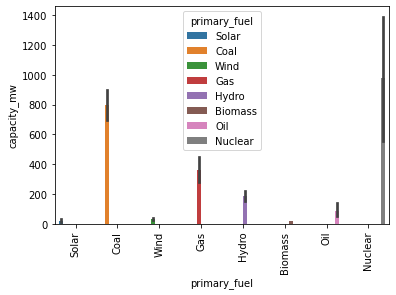

In [43]:
#plt.figure(figsize=(10,8))
sns.barplot(x='primary_fuel',y='capacity_mw',data=gpp,hue='primary_fuel')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Power Plants based on primary Fuel')

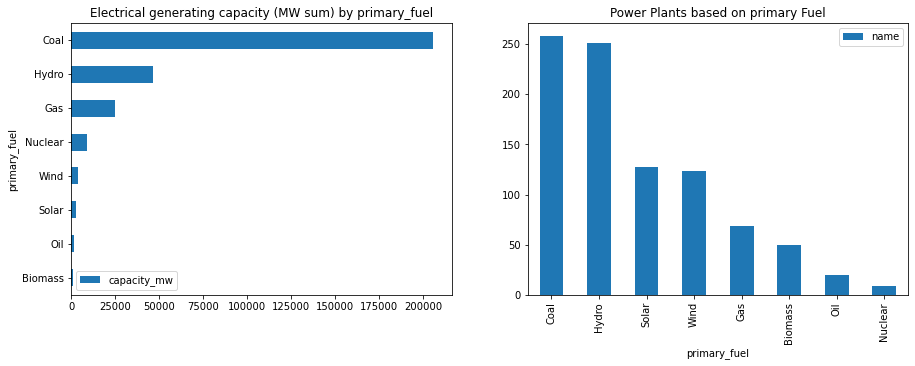

In [44]:
plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
gpp.groupby(["primary_fuel"])[["capacity_mw"]].sum().sort_values(by="capacity_mw").plot(kind="barh",ax=ax)
plt.title("Electrical generating capacity (MW sum) by primary_fuel");

ax = plt.subplot(1,2,2)
gpp.groupby(["primary_fuel"])[["name"]].count().sort_values(by="name", ascending=False).plot(kind="bar",ax=ax)
plt.title("Power Plants based on primary Fuel")

In [45]:
#encoding the data in the primary_fuel field
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gpp['primary_fuel'] = le.fit_transform(gpp['primary_fuel'])


In [46]:
gpp.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,6,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.609,1,2015,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,7,2015,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2,2004.0,Jk Cement ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,1,2015.0,Jk Cement ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


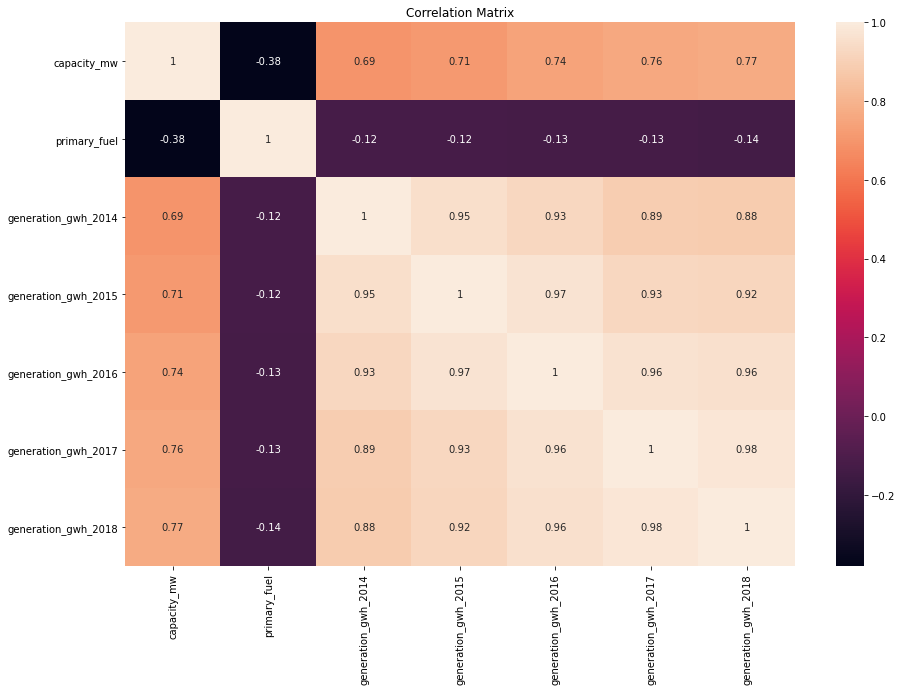

In [47]:
#chceking the relation between variables
corr = gpp.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [48]:
#dividing feature and target variables
x= gpp.drop(columns=['country','country_long','name','gppd_idnr','latitude','longitude','primary_fuel','commissioning_year',
                    'owner','source','url','geolocation_source','year_of_capacity_data','generation_data_source'],axis=1)

In [49]:
y = gpp['primary_fuel']

In [50]:
from sklearn.preprocessing import MinMaxScaler

mms =MinMaxScaler()
x_scaled = mms.fit_transform(x)
x_scaled

array([[0.00052521, 0.08645869, 0.07951233, 0.08222345, 0.07255266,
        0.07402106],
       [0.02058824, 0.08645869, 0.07951233, 0.08222345, 0.07255266,
        0.07402106],
       [0.00823529, 0.08645869, 0.07951233, 0.08222345, 0.07255266,
        0.07402106],
       ...,
       [0.00535714, 0.08645869, 0.07951233, 0.08222345, 0.07255266,
        0.07402106],
       [0.01680672, 0.08645869, 0.07951233, 0.08222345, 0.07255266,
        0.07402106],
       [0.00346639, 0.08645869, 0.07951233, 0.08222345, 0.07255266,
        0.07402106]])

In [51]:
#finding the variance influence factor in each column 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['feature'] = x.columns

vif

,vif,feature
0,3.209326,capacity_mw
1,19.180318,generation_gwh_2014
2,44.704613,generation_gwh_2015
3,57.716914,generation_gwh_2016
4,64.734508,generation_gwh_2017
5,55.594957,generation_gwh_2018


# Model Building

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


lr = LinearRegression()

train = []
test = []
    
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
        
    train.append(r2_score(y_train,pred_train))
    test.append(r2_score(y_test,pred_test))

data = pd.DataFrame({'Train':train,
                    'Test':test})
data
    


,Train,Test
0,0.210737,0.187253
1,0.217523,0.121278
2,0.212052,0.159453
3,0.199078,0.226884
4,0.215579,0.167295
5,0.200450,0.224832
6,0.212039,0.175611
7,0.209088,0.172920
8,0.185253,0.260662
9,0.198792,0.218185


In [75]:
#Linear Regression

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=14)
lr.fit(x_train,y_train)
pred_test = lr.predict(x_test)
print("R2_score:",r2_score(y_test,pred_test)*100)
print("Mean_absolute_error:",mean_absolute_error(y_test,pred_test))
print("mean_squared_error",mean_squared_error(y_test,pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_test)))

R2_score: 18.84742081754094
Mean_absolute_error: 1.516276163895302
mean_squared_error 3.5878485262574618
RMSE: 1.8941616948553948


In [54]:
#crossvalidation for LinearRegression
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score  = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv_score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the Test is {test_accuracy})")
    print("/n")
    

At cross fold 2 the cv_score is 0.20447135712622883 and accuracy score for training is -0.16384009650012543 and accuracy for the Test is 0.18847420817540939)
/n
At cross fold 3 the cv_score is 0.17833217332586815 and accuracy score for training is -0.16384009650012543 and accuracy for the Test is 0.18847420817540939)
/n
At cross fold 4 the cv_score is 0.19799988293601223 and accuracy score for training is -0.16384009650012543 and accuracy for the Test is 0.18847420817540939)
/n
At cross fold 5 the cv_score is 0.1853983682252735 and accuracy score for training is -0.16384009650012543 and accuracy for the Test is 0.18847420817540939)
/n
At cross fold 6 the cv_score is 0.17090224039529392 and accuracy score for training is -0.16384009650012543 and accuracy for the Test is 0.18847420817540939)
/n
At cross fold 7 the cv_score is 0.17452805158165782 and accuracy score for training is -0.16384009650012543 and accuracy for the Test is 0.18847420817540939)
/n
At cross fold 8 the cv_score is 0.1

#### R2score and crossvalidation score are 18.84742081754094 and 0.18847420817540939 mean same.But the problem is insufficient data present in dataset.that why we are getting low score.


### Regularization 

In [55]:
#lasso
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score

parameters = {'alpha':[.0001,.001,.01,.1,1,10],
             'random_state':list(range(0,10))}
ls= Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [71]:

ls = Lasso(alpha=1,random_state= 0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predict_ls = ls.predict(x_test)

ls = r2_score(y_test,predict_ls)
print("r2_score",ls)
print("\n")
print("Mean_absolute_error:",mean_absolute_error(y_test,pred_test))
print("mean_squared_error",mean_squared_error(y_test,pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_test)))

r2_score 0.1888978437143486


Mean_absolute_error: 1.516276163895302
mean_squared_error 3.5878485262574618
RMSE: 1.8941616948553948


### Ensemble Technique

In [65]:
#RandomForestRegressor
parameters = {'criterion':['mse','mac'],
             'max_features':['auto','sqrt','log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [70]:
rf = RandomForestRegressor(criterion = 'mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_r = rf.predict(x_test)

rfs = r2_score(y_test,pred_r)
print('R2score',rfs*100)
print('\n')
print("Mean_absolute_error:",mean_absolute_error(y_test,pred_r))
print("mean_squared_error",mean_squared_error(y_test,pred_r))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_r)))

R2score 40.35799796646421


Mean_absolute_error: 1.0819472758576343
mean_squared_error 2.6368412594496884
RMSE: 1.6238353547849882


In [69]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_test_dec = dt.predict(x_test)

dt = r2_score(y_test,pred_test_dec)
print('R2score',dt*100)

print('\n')
print('MAE:', mean_absolute_error(y_test, pred_test_dec))
print('MSE:', mean_squared_error(y_test, pred_test_dec))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_test_dec)))

R2score 27.230384945592622


MAE: 1.0928141303141303
MSE: 3.2172280753057265
RMSE: 1.7936633115793295


### From medel buliding we observed that. For the 
### Linear Regression
#####                                 R2_score: 18.84742081754094
#####                                 Mean_absolute_error: 1.516276163895302
#####                                 Mean_squared_error 3.5878485262574618
#####                                 RMSE: 1.8941616948553948
### RandomForestRegressor
#####                                 R2score 40.35799796646421
#####                                 Mean_absolute_error: 1.0819472758576343
#####                                 Mean_squared_error 2.6368412594496884
#####                                 RMSE: 1.6238353547849882 
### Decision Tree
#####                            R2score 27.230384945592622
#####                           Mean_absolute_error: 1.0928141303141303
#####                          Mean_squared_error : 3.2172280753057265
#####                          RMSE: 1.7936633115793295

Text(0, 0.5, 'Predicted Y')

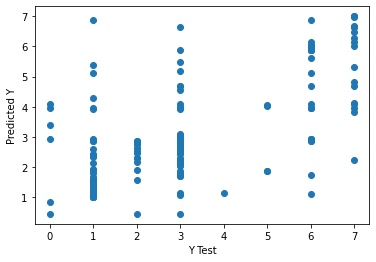

In [72]:
#plotting the resultant 
plt.scatter(x=y_test,y=pred_r)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [74]:
import joblib
joblib.dump(rf,"globalpower.pkl")

['globalpower.pkl']

#### Our dataset is insufficient data,that why it giving us low scores. 